# Исследование данных о российском кинопрокате <a id="intro"></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание" data-toc-modified-id="Описание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-типов-данных" data-toc-modified-id="Проверка-типов-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверка типов данных</a></span></li><li><span><a href="#Изучение-пропусков-в-датафрейме" data-toc-modified-id="Изучение-пропусков-в-датафрейме-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изучение пропусков в датафрейме</a></span></li><li><span><a href="#Изучение-дубликатов-в-датафрейме" data-toc-modified-id="Изучение-дубликатов-в-датафрейме-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изучение дубликатов в датафрейме</a></span></li><li><span><a href="#Изучение-категориальных-значений" data-toc-modified-id="Изучение-категориальных-значений-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изучение категориальных значений</a></span></li><li><span><a href="#Проверка-количественных-значений" data-toc-modified-id="Проверка-количественных-значений-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка количественных значений</a></span></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

## Описание

Требуется изучить рынок российского кинопроката и выявить текущие тренды. Особое внимание необходимо уделить фильмам, которые получили государственную поддержку.

**Заказчик исследования** — Министерство культуры Российской Федерации.

## Изучение данных из файла 

Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Прочитаем файлы  `mkrf_movies` и `mkrf_shows` и сохраним их в переменные. 

In [2]:
mkrf_movies =  pd.read_csv("mkrf_movies.csv")
mkrf_shows = pd.read_csv("mkrf_shows.csv")
pd.set_option("display.max_columns", None) # покажем все столбцы

Рассмотрим датафреймы.

In [3]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Оба датафрейме имеют столбец `puNumber`, объединим их в один датафрейм по общему столбцу. Но перед этим конвертируем данные общего столбца к единому типу данных.

In [5]:
mkrf_shows["puNumber"] = mkrf_shows["puNumber"].astype(str)
data = pd.merge(mkrf_movies, mkrf_shows, on="puNumber", how="left")

Таким образом, мы получили один датафрейм, рассмотрим общую информацию о нем.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Изучим пропуски в имеющихся столбцах.

In [7]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Новый датафрейм содержит следующие поля, в данных встречаются как количественные, так и категориальные данные:

- `title` — название фильма;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма;
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

### Выводы

Получен новый датафрейм на основе двух других. В ходе первичного анализа были выявлены пропуски и аномалии в данных, основные из которых:
- типы данных не соответствуют характеру данных;
- рейтинги картин предствалены в разном формате;
- в столбцах с категориальными данными имеется большое количество неявных дубликатов;
- информация о бюджете указана не по всем отчественным картинам.

Перейдем к предобработке данных.

[В начало](#intro)

## Предобработка данных

### Проверка типов данных

Для начала подкорректируем и приведем к единому стилю названия столбцов для удобства. 

In [8]:
data = data.rename(columns={"puNumber":"pu_number"})

Посмотрим текущие типы данных в датафрейме.

In [9]:
data.dtypes

title                     object
pu_number                 object
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

Заменим сначала значение "нет" в столбце `pu_number` на 0 и конвертирует тип данных в целочисленный.

In [10]:
try:
    data.loc[data["pu_number"] == "нет", "pu_number"] = 0
    data["pu_number"] = data["pu_number"].astype(int)
    print("Conversion successful")
except:
    print("Conversion failed")

Conversion successful


Конвертируем данные в столбцах в нужный формат там, где это представляется целесообраным.

Конверитуем дату к удобному для проведения вычислений формату даты и времени.

In [11]:
try:
    data["show_start_date"] = data["show_start_date"].astype("datetime64")
    print("Conversion successful")
except:
    print("Conversion failed")

Conversion successful


Столбцы объём возвратных и невозвратных средств государственной поддержки имеют пропуски, обусловленные скорее всего отсутствием как таковых средств государственной поддержки, заменим пропуски на ноль и конвертируем в целочисленный тип данных, детализация до копеек не требуется.

In [12]:
try:
    data["refundable_support"] = data["refundable_support"].fillna(0).astype(int)
    data["nonrefundable_support"] = data["nonrefundable_support"].fillna(0).astype(int)
    print("Conversion successful")
except:
    print("Conversion failed")

Conversion successful


Рассмотрим столбец рейтинг фильмов на кинопрокате.

In [13]:
data["ratings"].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В некоторых случая рейтинг фильмов представлен в процентном выражении, приведем данные к единообразию.

Создадим функцию которая будет принимать на входе проценты и возвращать рейтинг фильма в нужном нам формате данных.

In [14]:
def ratings_converter(row): # принимаем датафрейм в качестве аргумента функции
    if "%" in  str(row["ratings"]): # ищем рейтинги в процентом выражении
        return float(row["ratings"][:-1])/10 # избавляемся от процента 
    return float(row["ratings"])

In [15]:
data["ratings"] = data.apply(ratings_converter, axis=1)

In [16]:
data["ratings"].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

[В начало](#intro)

### Изучение пропусков в датафрейме

Выведем на экран имеющиеся пропуски.

In [17]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Изучим пропуски в столбце страна производства.

In [18]:
data[data["production_country"].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0,0,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,0,0,NaN,NaN,4.0,"мультфильм,комедия",NaN


Можно предположить, что страна производства по этим фильмам на прокате Россия. Заменим пропуски в столбце `production_country`.

In [19]:
data["production_country"] = data["production_country"].fillna("Россия")

[В начало](#intro)

### Изучение дубликатов в датафрейме

Проверим наличие явных дубликатов в датафрейме.

In [20]:
data.duplicated().sum()

0

Изучим столбцы по отдельности.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   pu_number              7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7486 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     7486 non-null   int64         
 10  nonrefundable_support  7486 non-null   int64         
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [22]:
data[data["title"].duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0,0,NaN,NaN,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,0,0,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.00
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,0,0,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,0,0,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,0,0,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,0,0,NaN,NaN,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,0,0,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


Имеются дубикаты в столбце с названием фильма, однако, номера прокатных удостоверений при этом отличаются. Например: фильм "Особо опасен" на кинопрокате была дважды в 2015 и 2016 годах, иными словами фильм один, но прокаты разные, а значит, мы имеем дело не с дубликатами.

In [23]:
data[data["pu_number"].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0,0,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0,0,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0,0,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0,0,NaN,NaN,6.8,"комедия,криминал",NaN


Несмотря на то, что прокатные удостоверения одинаковые, сами фильмы при этом совсем разные. Однозначно это не дубликаты, закроем на это глаза, так как эти данные не повлияют на результаты исследования.

[В начало](#intro)

### Изучение категориальных значений

Явных дубликатов в датафрейме не обнаружено, проверим наличие неявных дубликатов среди категориальных значений.

Посмотрим на уникальные значения в столбце тип фильма.

In [24]:
data["type"].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Некоторые типы фильмов имеют неявные дубликаты за счет пробелов в значениях, устраним их.

In [25]:
data["type"] = data["type"].str.strip()
data["type"].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Уникальных типов фильмов стало меньше.

Некоторые фильмы на кинопрокате имеют сразу несколько стран-производителей. Основная проблема в том, что в процессе перечисления стран-производителей используются не унифицированные разделители, что явно увеличивает количество уникальных значений в столбце. Используем унифицированные разделители для перечисления стран-производителей. Кроме того, в столбце встречаются значения, имеющие пробелы в начале и в кoнце, например, "СССР". Однако за счет пробелов все эти значения считаются уникальными. Также уберем пробелы в начале и в конце строк.

Посчитаем количество дубликатов до обработки.

In [26]:
data["production_country"].duplicated().sum()

6536

In [27]:
data["production_country"] = data["production_country"].str.replace(" - "," | ")
data["production_country"] = data["production_country"].str.replace("-"," | ")
data["production_country"] = data["production_country"].str.replace(", "," | ")
data["production_country"] = data["production_country"].str.strip()

Повторно посчитаем количество дубикатов в столбце страна-производитель.

In [28]:
data["production_country"].duplicated().sum()

6668

Количество дубликатов стало заметно больше, мы смогли пролить свет на неявные дубликаты и сделать их явными. Движемся дальше. 

[В начало](#intro)

### Проверка количественных значений

В датафрейме количественными значениями выступают столбцы с объемом государственной поддержки, бюджетом и сборами. Кроме того, большая часть этих данных указана только по картинам с государстенной поддержкой. Особое внимание уделим столбцу, содержащий информацию о бюджете на картины.

In [29]:
data[data["budget"] == 0]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0,23000000,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0,75000000,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000,70000000,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000,0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000,100000000,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0,59000000,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0,35000000,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0,6000000,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000,51000000,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0,250000000,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Бюджет на некоторые прокатные картины 0 руб., в то время как указана информация об объеме государственной поддержки. Заменим нулевые бюджеты на сумму возвратных и невозвратных объемов госудраственной поддержки. Напишем для этого функцию.

In [30]:
def set_budget(row):
    if row["budget"] == 0:
        return (row["refundable_support"] + row["nonrefundable_support"])
    return row["budget"]

Применим функцию и проверим наличие нулей в бюджете.

In [31]:
data["budget"] = data.apply(set_budget, axis=1)
data[data["budget"] == 0]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Нулевые знечения были успешно заменены.

### Добавление новых столбцов

Добавим в датафрейм столбец с годом показа картины на кинопрокате.

In [32]:
data["show_year"] = data["show_start_date"].dt.year

Добавим также столбцы, содержащие фамилию и имя главного режиссера, а также основной жанр картин. Уберем пробелы по краям значений там, где это целесообразно.

In [33]:
data["chief_director"] = data["director"].str.split(",").str[0]
data["main_genre"] = data["genres"].str.split(",").str[0]
data["chief_director"] = data["director"].str.strip()
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,chief_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0,0,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


Также добавим столбец с долей государственной поддержки в общем бюджете на картину. Исходим из того, что в столбец `budget` включена сумма государственной поддержки.

In [34]:
data["government_support_ratio"] = (data["refundable_support"] + data["nonrefundable_support"]) / data["budget"]
data["government_support_ratio"] = data["government_support_ratio"].round(2)
data[~data["government_support_ratio"].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,chief_director,main_genre,government_support_ratio
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857.0,Министерство культуры,NaN,NaN,28140.0,2014,А.Якимчук,NaN,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,"Р.Давлетьяров, С.Комаров",комедия,0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140.0,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122.0,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,0.62


Расчитаем прибыль/убыток по картинам.

In [35]:
data["profit_loss"] = (data["box_office"] - data["budget"])

### Выводы

По результатам предобработки данных проведены следующие меры: 
- исправлены типы данных, не соответствующие характеру данных;
- исправлены рейтинги картин представленные в разном формате;
- устранены неявные дубликаты в столбцах с категориальными данными;
- заполнены пропуски в бюджетах отчественных картин.

Для проведения исследовательского анализа данных были выведены дополнительные вспомогательные столбцы:
- годы выпуска картин в прокат;
- имена главных режиссеров картин;
- основные жанры картин;
- показатель, отражающий долю участия государства в бюджетах картин;
- прибыль/убыток по картинам.

[В начало](#intro)

## Исследовательский анализ данных

Проанализируем динамику выхода фильмов в кинопрокат за каждый год. В анализ возьмем только картины в кинопрокате, получившие сборы.

Посмотрим какую долю составляют картины без сборов.

In [36]:
data[~data["box_office"].isna()].shape[0]/data["box_office"].shape[0]

0.42185412770504943

В период с 2010 года по 2019 год картины, получившие сборы в кинопрокате составляют 42.2%, более половины картин не собрали сборы. Причины, по которым картины не собрали сборы могут быть разные: начиная от того, что картины могли не выйти на показ заканчивая ошибкой в выгрузке, благодаря чему была утеряна часть данных.

Создадим сводную таблицу, где вычислим основные показатели показа картин по годам.

In [37]:
data_pivot = (data[data["box_office"]!=0.0]
              .pivot_table(index="show_year", 
                           values="box_office", 
                           aggfunc=["count", 
                                    "mean", 
                                    "median", 
                                    "std", 
                                    "min", 
                                    "max", 
                                    "sum"]))
data_pivot.columns = ["box_office_count", 
                      "box_office_mean", 
                      "box_office_median", 
                      "box_office_std", 
                      "box_office_min", 
                      "box_office_max", 
                      "box_office_sum"]
data_pivot = data_pivot.astype(int).reset_index()
data_pivot

,show_year,box_office_count,box_office_mean,box_office_median,box_office_std,box_office_min,box_office_max,box_office_sum
0,2010,101,24046,1710,146138,75,1446400,2428654
1,2011,109,129383,3000,1114446,125,11618085,14102765
2,2012,123,56548,6220,233666,80,2311220,6955423
3,2013,179,166478,3580,1525589,40,19957031,29799706
4,2014,273,27270885,20400,122324726,50,1016410635,7444951859
5,2015,462,85492132,5003450,220771366,100,1658861425,39497365196
6,2016,525,91173904,3915041,251252220,200,2048126108,47866299741
7,2017,357,136032793,9968340,323251440,7900,2779686144,48563707217
8,2018,475,104565059,8891102,272079011,41225,2271754004,49668403134
9,2019,530,91369261,4627798,290931159,4398,3073568690,48425708779


Посчитаем количество всех картин представленных в датафрейме в разрезе по годам.  

In [38]:
show_year_count = data["show_year"].value_counts().reset_index()
show_year_count.columns = ["show_year", "count"]
show_year_count

,show_year,count
0,2010,985
1,2019,930
2,2018,891
3,2016,818
4,2014,807
5,2015,705
6,2013,630
7,2011,622
8,2012,593
9,2017,505


Объеденим два полученных датафрейма.

In [39]:
data_pivot = pd.merge(data_pivot, show_year_count, on="show_year", how="left")

Расчитаем долю картин, по которым были получены сборы в разрезе по годам.

In [40]:
data_pivot["box_office_count_ratio"] = data_pivot["box_office_count"]/data_pivot["count"]*100

Поставим столбцы в логическом порядке и приведем все числовые показатели к целому формату представляения данных. 

In [41]:
data_pivot = data_pivot[["show_year", 
                         "count", 
                         "box_office_count", 
                         "box_office_count_ratio", 
                         "box_office_mean", 
                         "box_office_median", 
                         "box_office_std",  
                         "box_office_min", 
                         "box_office_max",
                         "box_office_sum"]].astype(int)
data_pivot

,show_year,count,box_office_count,box_office_count_ratio,box_office_mean,box_office_median,box_office_std,box_office_min,box_office_max,box_office_sum
0,2010,985,101,10,24046,1710,146138,75,1446400,2428654
1,2011,622,109,17,129383,3000,1114446,125,11618085,14102765
2,2012,593,123,20,56548,6220,233666,80,2311220,6955423
3,2013,630,179,28,166478,3580,1525589,40,19957031,29799706
4,2014,807,273,33,27270885,20400,122324726,50,1016410635,7444951859
5,2015,705,462,65,85492132,5003450,220771366,100,1658861425,39497365196
6,2016,818,525,64,91173904,3915041,251252220,200,2048126108,47866299741
7,2017,505,357,70,136032793,9968340,323251440,7900,2779686144,48563707217
8,2018,891,475,53,104565059,8891102,272079011,41225,2271754004,49668403134
9,2019,930,530,56,91369261,4627798,290931159,4398,3073568690,48425708779


Проанализируем динамику роста количества картин, получивших сборы в разрезе годов.

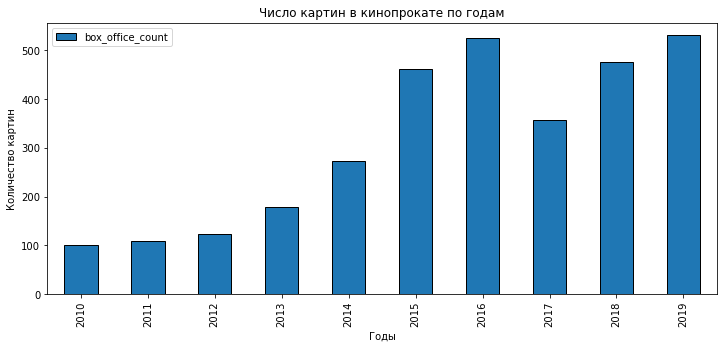

In [42]:
(data_pivot
 .plot(kind="bar",
       x="show_year",
       y="box_office_count",
       figsize=(12,5),
       ec="black",
       legend=True)
)

plt.title("Число картин в кинопрокате по годам")
plt.xlabel("Годы")
plt.ylabel("Количество картин")
plt.show()

По графику отчетливо прослеживается положительная динамика роста количества картин, получивших сборы. Меньше всего картин было в 2010 году, около 100, тогда как в 2019 году таких картин порядка 500. В 2017 году была ощутимая просадка, однако в течении двух лет ситуация стабилировалась.

Как уже было выявлено ранее, у более 60% картин не представлена информация о сборах. Рассмотрим как изменялась эта динамика из года в год.

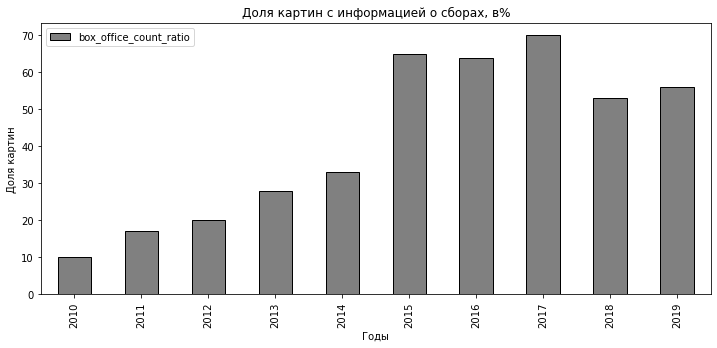

In [43]:
(data_pivot
 .plot(kind="bar",
       x="show_year",
       y="box_office_count_ratio",
       figsize=(12,5),
       ec="black",
       color="grey",
       legend=True)
)

plt.title("Доля картин с информацией о сборах, в%")
plt.xlabel("Годы")
plt.ylabel("Доля картин")
plt.show()

Не смотря на то, что больше всего картин в кинопрокате со сборами были представлены в 2019 году, наиболее полная информация по сборам была представлена в 2017 года, до этого года наблюдался практически стабльный рост в полноте представленной информации, однако в 2018 году произошел спад, за 2019 год ситуация улучшилась не сильно.

Рассмотрим динамику сборов по годам.

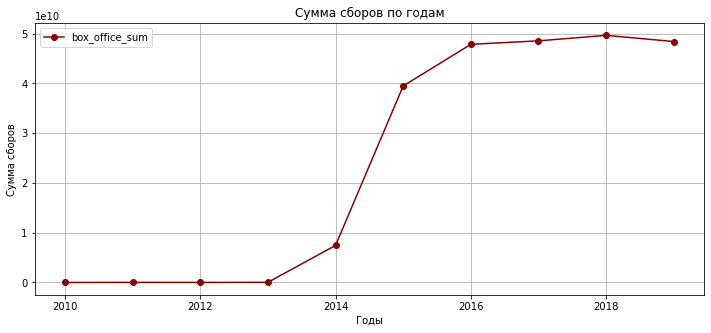

In [44]:
(data_pivot
 .plot(x="show_year",
       y="box_office_sum",
       style="o-",
       figsize=(12,5),
       grid=True,
       color="darkred",
       legend=True)
)

plt.title("Cумма сборов по годам")
plt.xlabel("Годы")
plt.ylabel("Сумма сборов")
plt.show()

В период с 2010 до 2013 года сумма сборов символическая, на уровне до 30 млн руб. В период с 2013 по 2016 наблюдается резкий скочок в сборах, в 2016 году сборы составили 47.866 млрд руб. рост весьма значительный. В период с 2016 года по 2019 сумма сборов была практически на одном уровне, наибольшие сборы в 49.668 млрд руб. пришлись на 2018 год.

Проанализируем средние и медианные сборы по годам.

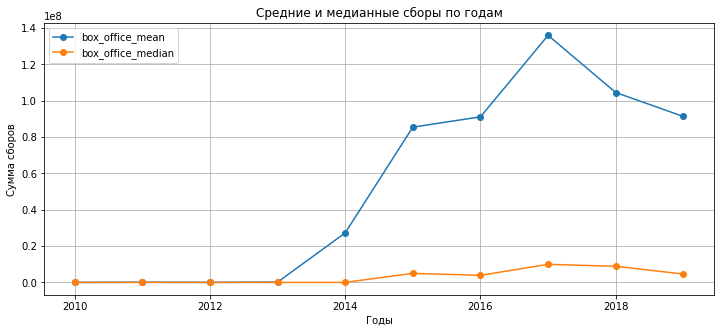

In [45]:
(data_pivot
 .plot(x="show_year",
       y=["box_office_mean", "box_office_median"],
       style="o-",
       figsize=(12,5),
       grid=True,
       legend=True)
)

plt.title("Средние и медианные сборы по годам")
plt.xlabel("Годы")
plt.ylabel("Сумма сборов")
plt.show()

Траектория роста линии средней суммы сборов соответсвует траектории роста суммы сборов, что говорит о прямой зависимости средней суммы от общей. В тоже время медианное значение суммы сборов по годам не подвержено таким скачкам, что говорит о том, что в общей сумме сборов имеются картины с весьма большими сборами, которые не учитываются медианой. Количество картин с суммой сборов свыше 1 млрд руб. после 2013 года составляет 55, об этом также говорит рост стандартного отклонения за указанный период.

Изучим также динамику минимальной и максмимальной суммы сборов за указанный период.

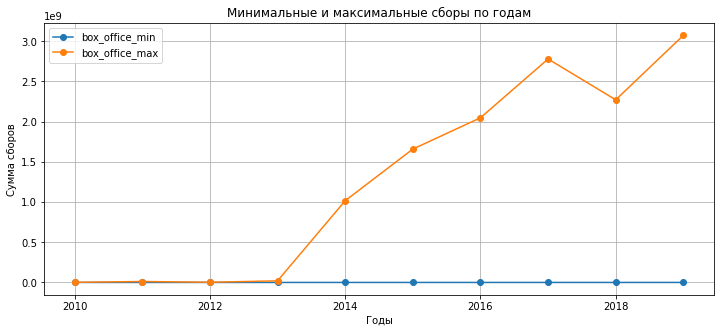

In [46]:
(data_pivot
 .plot(x="show_year",
       y=["box_office_min", "box_office_max"],
       style="o-",
       figsize=(12,5),
       grid=True,
       legend=True)
)

plt.title("Минимальные и максимальные сборы по годам")
plt.xlabel("Годы")
plt.ylabel("Сумма сборов")
plt.show()

Минимальная сумма сборов практически не изменена на протяжении всего периода, тогда как максимальная сумма с 2013 года растет, в 2019 году максимальная сумма сборов была по картине "Холоп" в главных ролях с Милош Бикович, сумма сборов составили свыше 3 млрд руб.

Проанализируем влияние возрастного ограничения на сумму сборов в период с 2015 по 2019 год.

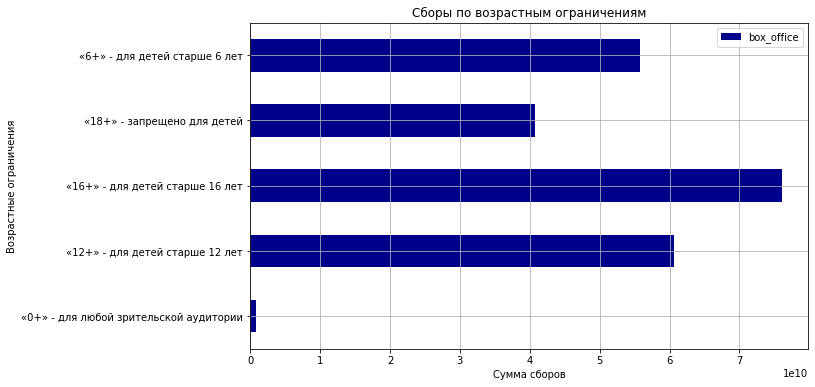

In [47]:
(data
 .query("show_year >= 2015")
 .pivot_table(index="age_restriction", 
              values="box_office", 
              aggfunc="sum")
 .plot(kind="barh",
       figsize=(10,6),
       grid=True,
       color="darkblue",
       legend=True)
)

plt.title("Cборы по возрастным ограничениям")
plt.xlabel("Сумма сборов")
plt.ylabel("Возрастные ограничения")
plt.show()

На диаграмме показано, что наименьшие сборы получили картины с возрастным ограничением 0+, наибольшее сборы собраны по картинам с возрастным ограничением от 16+, однако, можно ли сделать вывод о том, что больше всего зрителей старше 16, скорее нет. Так как самих картин с ворастным ограничением от 0+ может быть очень мало, так же как и картин с ограничем от 18+, проверим гипотезу.

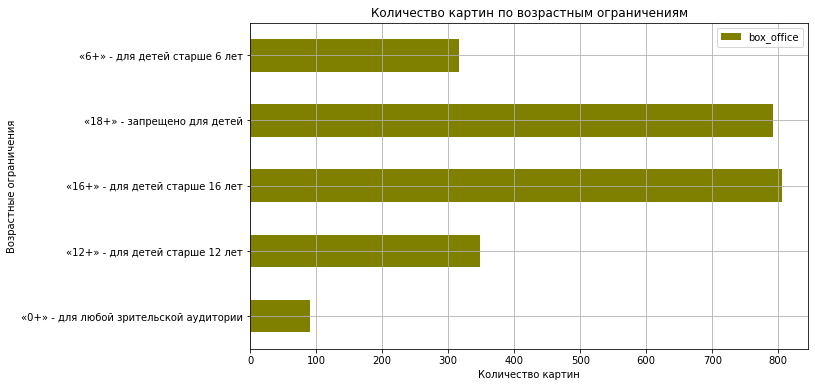

In [48]:
(data
 .query("show_year >= 2015")
 .pivot_table(index="age_restriction", 
                  values="box_office", 
                  aggfunc="count")
 .plot(kind="barh",
       figsize=(10,6),
       grid=True,
       color="olive",
       legend=True)
)

plt.title("Количество картин по возрастным ограничениям")
plt.xlabel("Количество картин")
plt.ylabel("Возрастные ограничения")
plt.show()

Гипотеза частично подвердилась, нельзя однозначо сказать, что сборов по картинам с каким либо ворастным ограничением мало, так как самих фильмов с таким возрастным ограничением мало. Например, второе место по количеству занимают картины с ограничением 18+, в то время как по сумме сборов данная категория расположена на 4 месте. Картин с ограничением 6+ и 12+ не так много, но сумма сборов по ним довольно высокая. Кроме того, все еще сложно судить о том, какая группа людей больше смотрят картины, не учитываются как минимум 2 фактора: популярность и интерес к картинам из разных категорий, а также то, что совершеннолетние люди могут ходить на все фильмы без исключения. 

Посмотрим как менялись объемы сборов по протяжении всего периода по возрастным ограничениям.

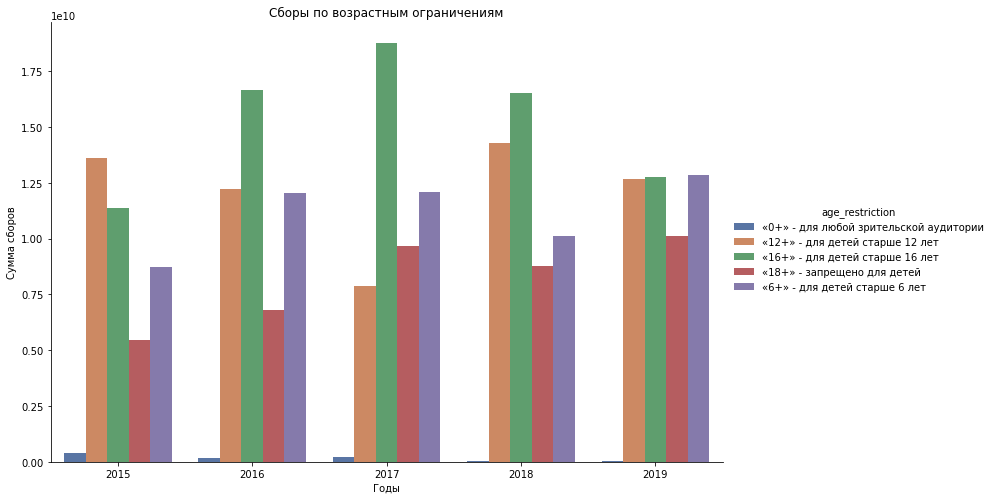

In [49]:
(sns
 .catplot(x="show_year", 
          y="box_office", 
          hue="age_restriction", 
          data=(data
                .query("show_year >= 2015")
                .pivot_table(index=["show_year","age_restriction"], 
                             values="box_office",
                             aggfunc="sum")
                .reset_index()
               ), 
          kind="bar",
          height=7,
          aspect=1.5,
          palette="deep"
        )
)
          
plt.title("Cборы по возрастным ограничениям")
plt.xlabel("Годы")
plt.ylabel("Сумма сборов")
plt.show()

- В течении анализируемого периода объем сборов по картинам с возрастным ограничением 0+ был стабильно мал, лучшие показатели при этом приходятся на начало периода.
- Сборы по картинам с возрастным ограничением 18+ показывают положительную динамику, в 2018 году наблюдалась незначительная просадка.
- Сборы по картинам с возрастным ограничением 16+ показывают рост до 2017 года, далее наблюдается спад.
- Сборы по картинам с возрастным ограничением 12+ показывают сильно волатильную динамику. Наблюдается падение до 2018 года, затем резкий рост до рекордных сборов в рамках рассматриваемого периода и сразу за ним незначительное падение.
- Сборы по картинам с возрастным ограничением 6+ аналогично показывают волатильную динамику. С 2015 по 2016 год был рост, затем планка в 2017 году, ощутимое снижение в 2018 году и рост в 2019.

Проанализируем картины, получишие государственное финансирование. 

Создадим отдельный датафрейм с картинами, получившими государственную поддержку.

In [50]:
data_support = data[(data["refundable_support"] != 0)|(data["nonrefundable_support"] != 0)]
data_support.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,chief_director,main_genre,government_support_ratio,profit_loss
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.33,-79046546.4
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857.0,Министерство культуры,NaN,NaN,28140.0,2014,А.Якимчук,NaN,0.70,-37114717.0
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,"Р.Давлетьяров, С.Комаров",комедия,0.61,-156066458.5


Создадим столбец с общим объемом государственной поддержки.

In [51]:
data_support["total_support"] = data_support["refundable_support"] + data_support["nonrefundable_support"]
data_support.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,chief_director,main_genre,government_support_ratio,profit_loss,total_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.33,-79046546.4,26500000
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857.0,Министерство культуры,NaN,NaN,28140.0,2014,А.Якимчук,NaN,0.70,-37114717.0,26000000
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,"Р.Давлетьяров, С.Комаров",комедия,0.61,-156066458.5,107847945


Изучим динамику производства российских картин с государственной поддержкой за анализируемый период.

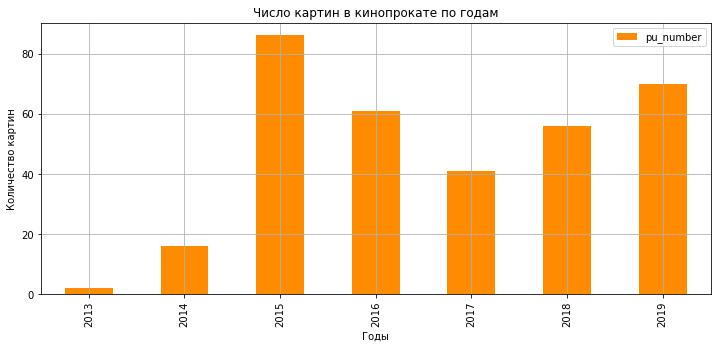

In [52]:
(data_support
 .pivot_table(index="show_year", 
              values="pu_number", 
              aggfunc="count")
 .reset_index()
 .plot(kind="bar",
       x="show_year",
       y="pu_number",
       grid=True,
       color="darkorange",
       figsize=(12,5),
       legend=True)
)

plt.title("Число картин в кинопрокате по годам")
plt.xlabel("Годы")
plt.ylabel("Количество картин")
plt.show()

Больше всего картин участвовали в кинопрокате в 2015 году, спад начатый сразу после 2015 года прекратился в 2017 году, далее наблюдался рост, однако темпы не позволили догнать показатели 2015 года.
Кроме того, данных за 2013-2014 годы мало, вероятно, это все данные, однако они выбиваются из общей массы и могут повлиять на достверность результатов исследования, устраним их. 

In [53]:
data_support = data_support[data_support["show_year"]>2014]

В целом наблюдается положительная динамика, государство активно финасирует российские картины, однако, количество самих картин показатель не статичный, необходимо изучить объемы государственной поддержки за каждый анализируемый год. Для этого изучим медианный и средний объем государственной поддержки.

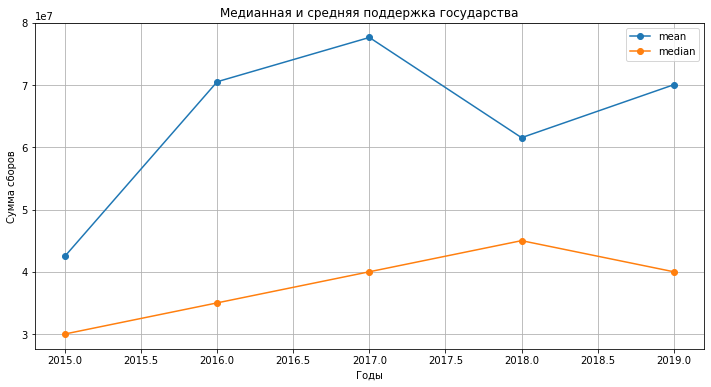

In [54]:
(data_support
 .groupby("show_year")["total_support"]
 .agg(["mean", "median"])
 .reset_index()
 .astype(int)
 .plot(x="show_year", y=["mean","median"],
       style="o-",
       grid=True,
       figsize=(12,6),
       legend=True)
)

plt.title("Медианная и средняя поддержка государства")
plt.xlabel("Годы")
plt.ylabel("Сумма сборов")
plt.show()

Среднее значение показывает довольно высокую поддержку  со стороны государства, в то время как медианное значение нивелирует большие выбросы. Не все картины получают одинаковую поддержку, некоторые больше, что сильно отражается на среднеарифметическом значении по годам. Самое высокое среднее значение приходится на 2017 год, тогда как медиана считает, что пик поддержки это 2018 год. Медиана показывает стабильный рост государственной поддержки до 2018 год, затем в 2019 году наблюдается падение до уровня 2017 года.

Рассмотрим как менялась доля государственной поддержки в течении анализируемого периода. 

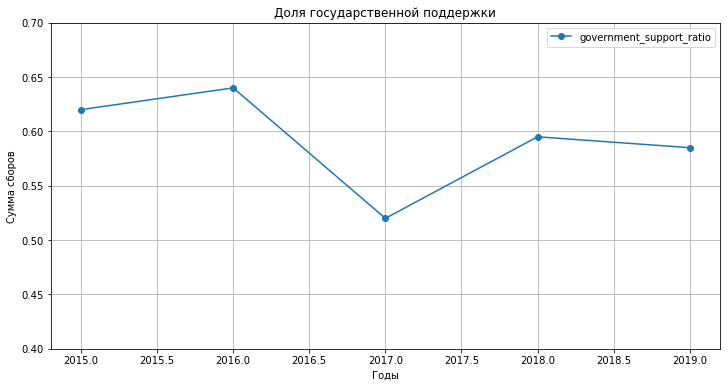

In [55]:
(data_support
 .groupby("show_year")["government_support_ratio"]
 .agg("median")
 .reset_index()
).plot(x="show_year", y="government_support_ratio",
style="o-",
grid=True,
figsize=(12,6),
legend=True)

plt.ylim(0.4, 0.7)
plt.title("Доля государственной поддержки")
plt.xlabel("Годы")
plt.ylabel("Сумма сборов")
plt.show()

В целом наблюдается снижение доли государственной поддержки в производстве отчественных картинах, что может быть связано распределением государственного бюджета между растущим числом картин. Пик доли государственного участия приходится на 2016 год, сразу после которого в 2017 году наблюдается наименьшая доля участия государства за анализируемый период.

Рассмотрим динамику бюджетов картин по годам.

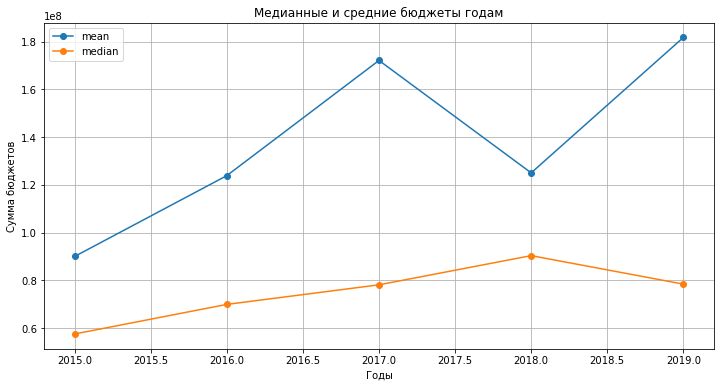

In [56]:
(data_support
 .groupby("show_year")["budget"]
 .agg(["mean", "median"])
 .reset_index()
 .astype(int)
 .plot(x="show_year", y=["mean","median"],
       style="o-",
       grid=True,
       figsize=(12,6),
       legend=True)
)

plt.title("Медианные и средние бюджеты годам")
plt.xlabel("Годы")
plt.ylabel("Сумма бюджетов")
plt.show()

При сравнении двух последних графиков можно заметить, что доля государственной поддежки выше в годы низких средних бюджетов и ниже в годы высоких средних бюджетов.

Рассмотрим окупаемость картин с государственной поддержкой.

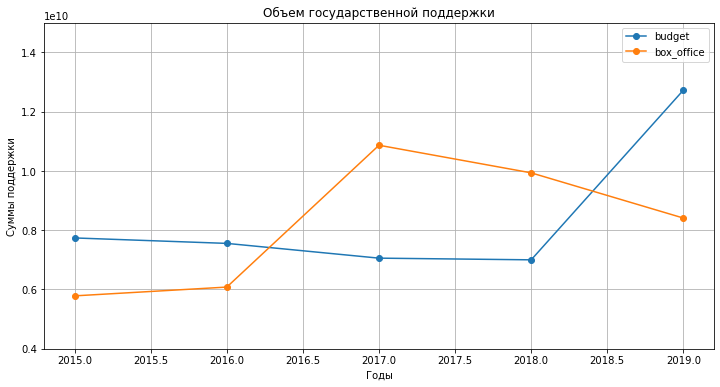

In [57]:
(data_support
 .pivot_table(index="show_year", 
              values=["budget","box_office"], 
              aggfunc="sum")
 .reset_index()
 .plot(x="show_year",
       y=["budget","box_office"],
       figsize=(12,6),
       grid=True,
       style="o-",
       legend=True)
)

plt.title("Объем государственной поддержки")
plt.xlabel("Годы")
plt.ylabel("Суммы поддержки")
plt.ylim(4_000_000_000, 15_000_000_000)
plt.show()

По графику видно, что картины окупились в 2017 и 2018 году, 2015, 2016, 2018, 2019 годы не окупились. 

Проанализируем рейтинги картин, получивших государственную поддержку. 

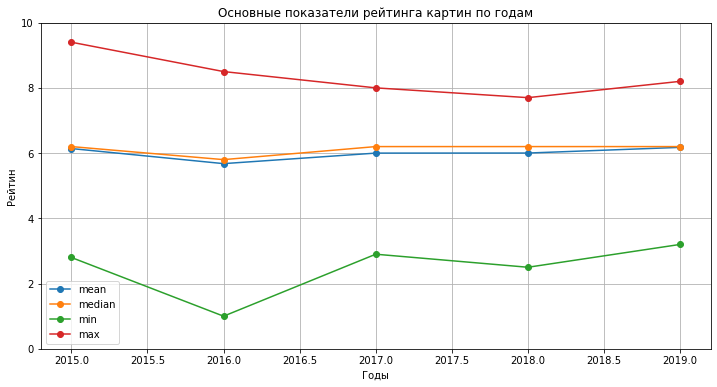

In [58]:
(data_support
 .groupby("show_year")["ratings"]
 .agg(["mean", "median", "min", "max"])
 .reset_index()
 .plot(x="show_year", y=["mean","median", "min", "max"],
       style="o-",
       grid=True,
       figsize=(12,6),
       legend=True)
)
plt.ylim(0, 10)
plt.title("Основные показатели рейтинга картин по годам")
plt.xlabel("Годы")
plt.ylabel("Рейтин")
plt.show()

Медиана и среднеарифметическое значение по годам практически на одном уровне, медиана чуть выше, что может говорить о том, что картин с меньшим рейтингом больше, чем с большим. За весь анализируемый период рейтинг картин с государственной поддержкой на уровне 6. Среди показов в 2016 году имеется картина с рейтин 1, сложно представить такой низкий рейтинг, однако, практика говорит об обратном. Среди отчественных картин также имеются картины с высоким рейтингом свыше 8, что говорит о большом успехе некоторых картин. Подводя итог можно сказать, что есть куда расти по качеству отечественных картин.

Категоризируем рейтинги картин и выясним количество картин в каждой картегории по годам.

In [59]:
def set_category(rating):
    if rating < 3.5:
        return "Плохой"
    elif rating < 5.5: 
        return "Низкий"
    elif rating < 7.5: 
        return "Средний"
    else:
        return "Высокий"

Применим функцию.

In [60]:
data_support["rating_category"] = data_support.loc[~data_support["ratings"].isna(), "ratings"].apply(set_category)

Визиализруем данные.

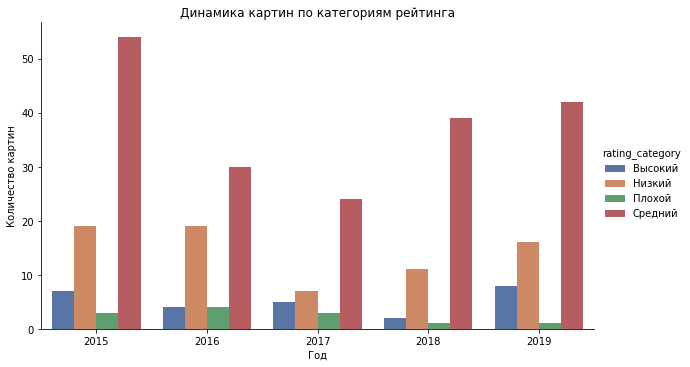

In [61]:
(sns
 .catplot(x="show_year", 
          y="pu_number", 
          hue="rating_category", 
          data=((data_support
                 .pivot_table(index=["show_year","rating_category"], 
                              values="pu_number", 
                              aggfunc="count"))
                .reset_index()),
          kind="bar",
          height=5,
          aspect=1.7,
          palette="deep"
         )
)
plt.title("Динамика картин по категориям рейтинга")
plt.xlabel("Год")
plt.ylabel("Количество картин")
plt.show()

На протяжении анализируемого периода количество картин со средним рейтингом лидируют, просадка в 2017 харакеризуется низкой активной российского кинопроката в этом году. Количество картин с низким рейтингом было в переделах 20. Количество картин с высоким рейтингом не поднималось выше 10. Количество картин с плохим рейтингом падает в течении анализируемого периода.

Посмотрим какие жанры картин наиболее востребованные в стране на протяжении всего анализируемого периода.

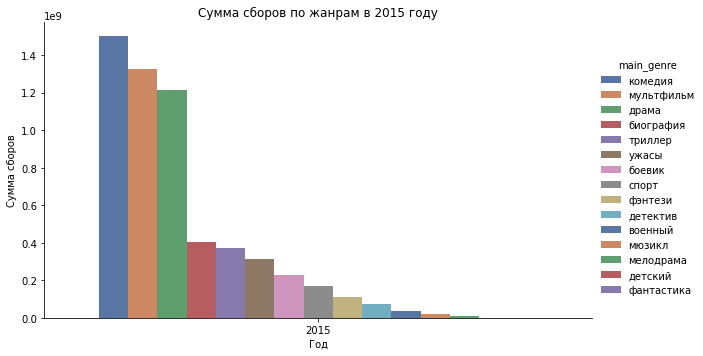

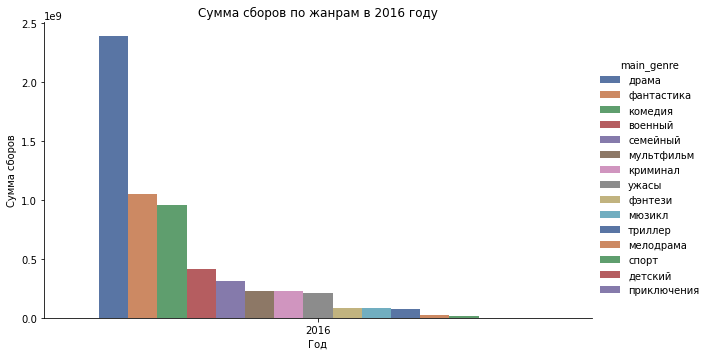

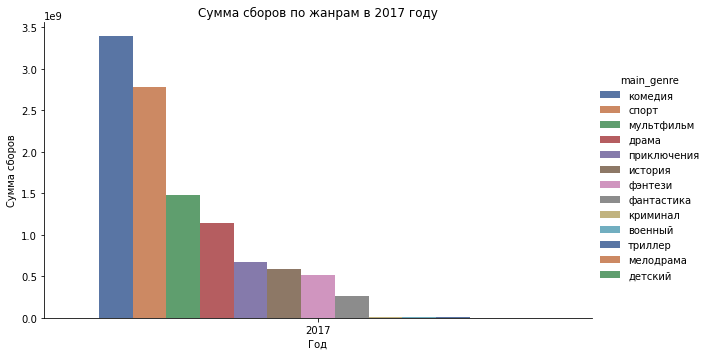

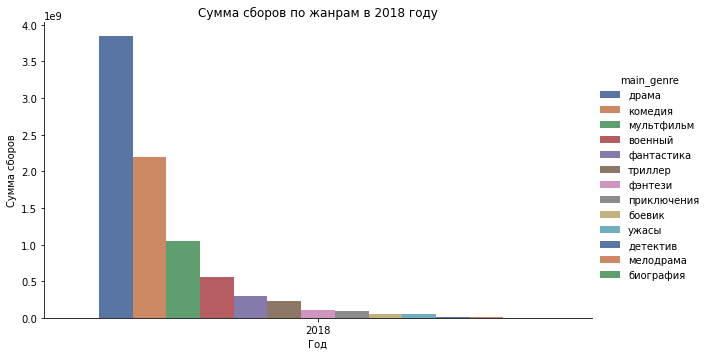

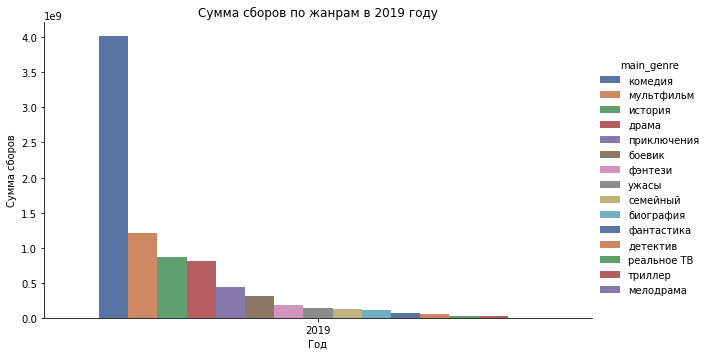

In [62]:
for year in data_support["show_year"].unique():
    data_graph = (data_support
                     .groupby(["show_year", "main_genre"])["box_office"]
                     .sum()
                     .reset_index()
                     .sort_values(by=["show_year","box_office"], ascending=False)
                    )
    (sns
     .catplot(x="show_year", 
              y="box_office", 
              hue="main_genre", 
              data=(data_graph[data_graph["show_year"] == year]),
              kind="bar",
              height=5,
              aspect=1.7,
              palette="deep"
             )
    )
    plt.title(f"Cумма сборов по жанрам в {year} году")
    plt.xlabel("Год")
    plt.ylabel("Сумма сборов")
    plt.show()

Топ 3 жанра с наибольшими сумма сборов на протяжении всего периода комедия, драма, мультфильм. 

Проверим также гипотезу, наиболее популярные жанры получают большую сумму госудраственной поддержки.

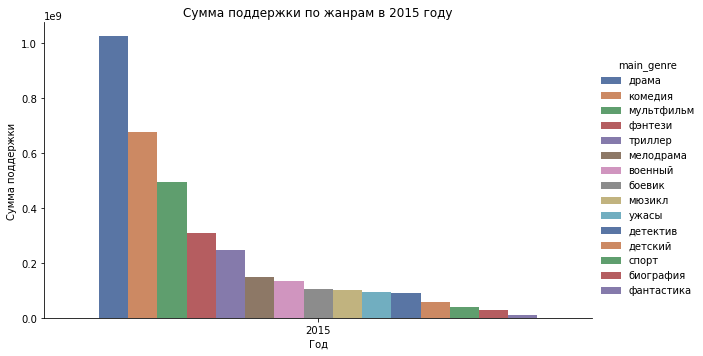

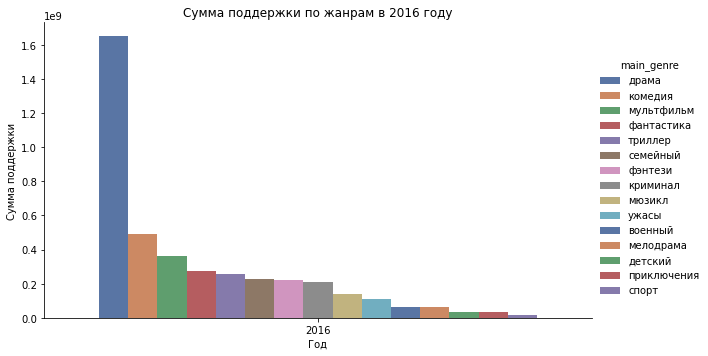

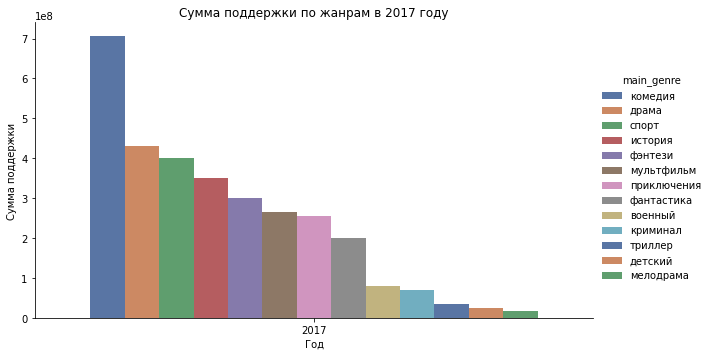

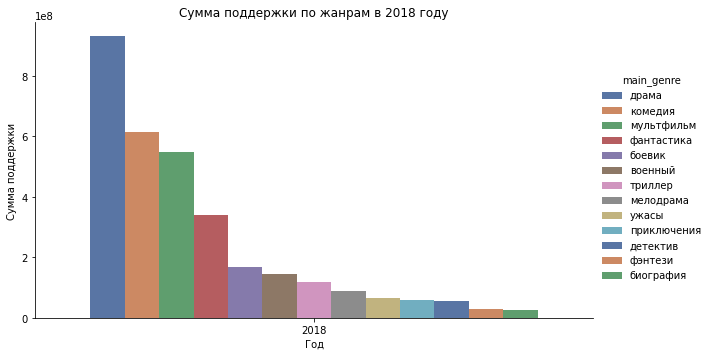

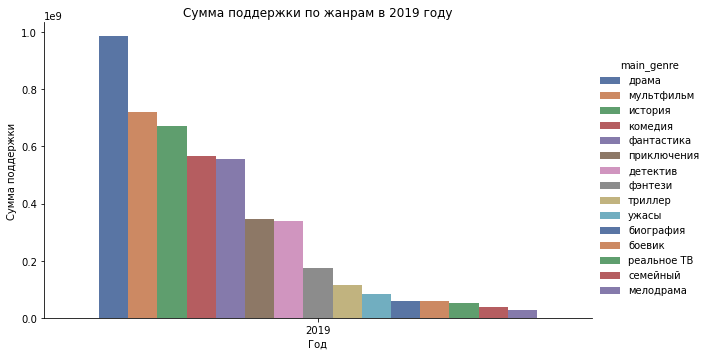

In [63]:
for year in data_support["show_year"].unique():
    data_graph = (data_support
                     .groupby(["show_year", "main_genre"])["total_support"]
                     .sum()
                     .reset_index()
                     .sort_values(by=["show_year","total_support"], ascending=False)
                    )
    (sns
     .catplot(x="show_year", 
              y="total_support", 
              hue="main_genre", 
              data=(data_graph[data_graph["show_year"] == year]),
              kind="bar",
              height=5,
              aspect=1.7,
              palette="deep"
             )
    )
    plt.title(f"Cумма поддержки по жанрам в {year} году")
    plt.xlabel("Год")
    plt.ylabel("Сумма поддержки")
    plt.show()

Гипотеза подтвердилась, наибольшую поддержку со стороны государства получили жанры комедия, драма, мультфильм на протяжении всего аналируемого периода.

Проаналируем типы картин, получивших наибольшую сумму сборов.

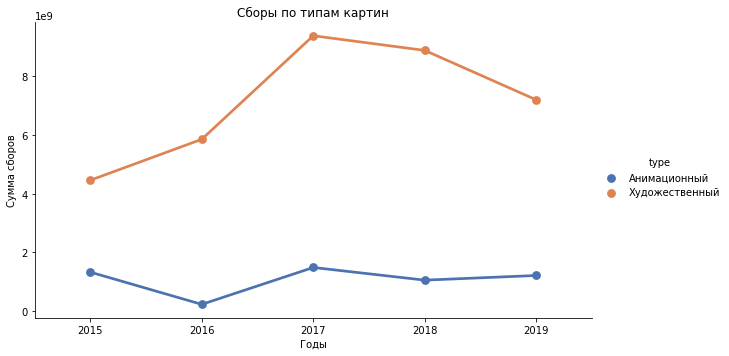

In [64]:
data_type = (data_support
             .groupby(["show_year","type"])["box_office"]
             .agg("sum")
             .reset_index()
            )
data_type = data_type[data_type["box_office"]>0]
(sns
 .catplot(x="show_year", 
          y="box_office", 
          hue="type", 
          data=data_type,
          kind="point",
          height=5,
          aspect=1.7,
          palette="deep"
        )
)
          
plt.title("Cборы по типам картин")
plt.xlabel("Годы")
plt.ylabel("Сумма сборов")
plt.show()

Популярными являются картины с художенственным типом, пик приходится на 2017 год. Как и по жанрам сборов по типам картин больше там, где больше государственных вложений. 

Проанализируем источники государственного финансирования призводства отечественных кинокартин.

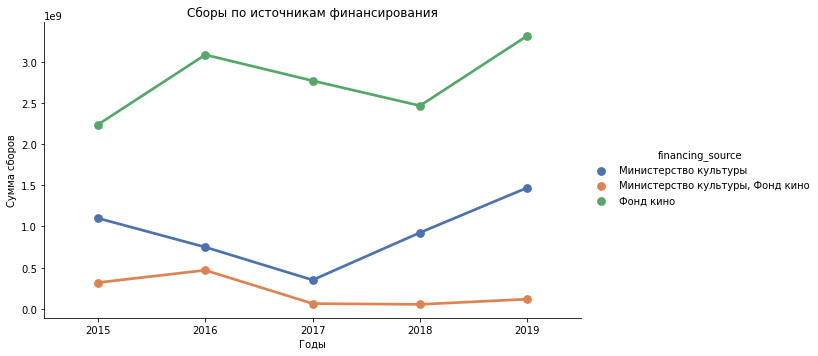

In [65]:
(sns
 .catplot(x="show_year", 
          y="total_support", 
          hue="financing_source", 
          data=(data_support
                .groupby(["show_year","financing_source"])["total_support"]
                .agg("sum")
                .reset_index()
            ),
          kind="point",
          height=5,
          aspect=1.7,
          palette="deep"
        )
)
          
plt.title("Cборы по источникам финансирования")
plt.xlabel("Годы")
plt.ylabel("Сумма сборов")
plt.show()

На протяжении анализируемого периода основным источником финансирования отечественных картин является Фонд кино, вторым значимым источником выступает Министерство культуры. Меньше всего государственная поддержка выделяется с общим участием Фонда кино и Министерства культуруры. Прик государственного финансирования приходится на 2019 год.

Проанализируем зависимость между суммой сборов с разными количественными данными.

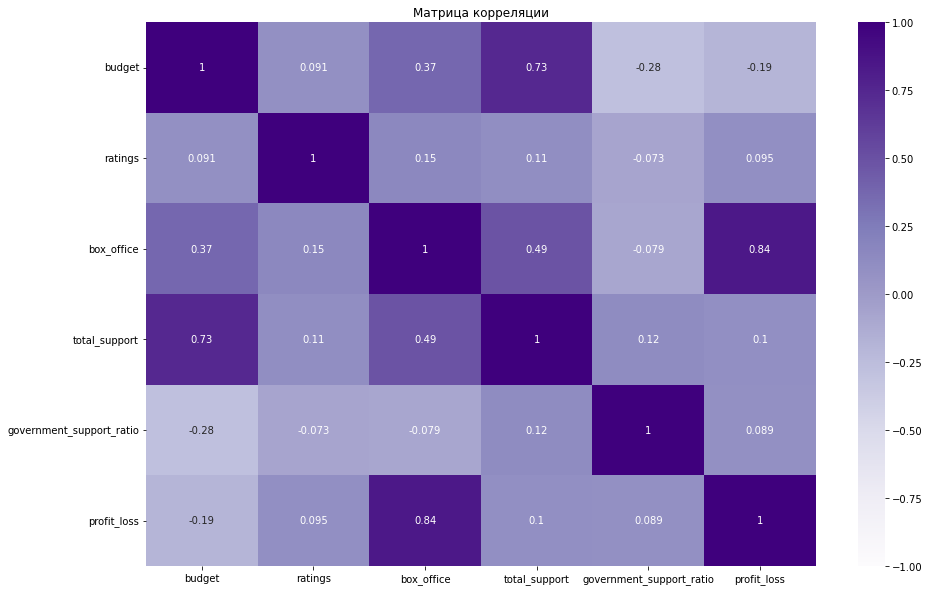

In [66]:
corr_matrix = (data_support[["budget",
                             "ratings",
                             "box_office",
                             "total_support",
                             "government_support_ratio",
                             "profit_loss"]]
               .corr()
)
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix,
            vmin=-1, 
            vmax=1,
            annot=True,
            cmap="Purples")
plt.title("Матрица корреляции")
plt.show()

Между прибылью/убытком и бюджетом существует слабая обратная линейная связь, чем больше бюджет, тем меньше прибыль, аналогично с долей государственной подержки, чем больше бюджет картины, тем меньше доля государственного участия.

Рост бюджета сопровождается ростом государственной поддержки, вероятно, на блогбастеры государство выделяет больше поддержки.

Интересным представляется не слабая линейная связь между сборами по картинам и бюджетом, рост бюджета влияет на рост сборов по картинам, можно предположить, что за счет высоких бюджетов картины получаются качественными. При этом не смотря на то, что есть предположение, что за счет высоких бюджетов картины получаются качественными, отсуствует линейная связь между ростом бюджета и рейтингом. Рейтинг фильма весьма субъективная оценка, поскольку складываются из числа проголосовавщих, но не числа всех зрителей, в данном случае возможно как занижение так и завышение рейтинга картин.

Кроме того, наблюдается положительная линейная связь между суммой годарственной поддержки и сборами, чем больше государство выделяет поддержки, тем больше сборов. 

Картины от каких киностудий получили больше всего сборов (какие киностудии входят в топ 10) ?

In [67]:
top_film_studio = (data_support
                   .groupby("film_studio")[["box_office","budget","total_support"]]
                   .agg(["sum", "count"])
                   .reset_index()
                  )

top_film_studio.columns =  ["film_studio", 
                            "box_office", 
                            "count", 
                            "budget", 
                            "count_1",
                            "total_support", 
                            "count_2"]

top_film_studio = top_film_studio[["film_studio","box_office","budget","total_support", "count"]]
top_film_studio = top_film_studio.sort_values(by="box_office", ascending=False).head(10)
top_film_studio["box_office"] = top_film_studio["box_office"].astype(int)
top_film_studio["budget"] = top_film_studio["budget"].astype(int)
top_film_studio.reset_index(drop=True)

,film_studio,box_office,budget,total_support,count
0,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",4181941534,1225476058,842104482,2
1,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",3073568690,160000000,60000000,1
2,"ООО ""Студия анимационного кино ""Мельница""",2890370003,1512454214,630000000,7
3,"ООО ""ТаББаК""",2665883722,1095888584,688000000,6
4,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",2271754004,563784717,180000000,1
5,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",1655037688,352477575,100000000,1
6,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",1445731797,148585222,85000000,1
7,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",1038321489,250000000,250000000,1
8,"ООО ""ДК интертеймент"", ООО ""Киностудия ""Слово""...",820528005,390191139,260000000,1
9,"ООО ""Лемон Филмз Студио""",752679777,493733957,225000000,1


Перед нами топ-10 киностудий, можно сказать, что производить кинокартины они умеют. Большинство киностудий из топ-10 за указанный период сняли 1-2 картины, за исключением некоторых отдельных киностудий. Наблюдатся случаи высоких кассовых сборов при относительно низком размере бюджета и поддержки.

Картины от каких главных режиссеров получили больше сборов (какие режиссеры входят в топ 10) ?

In [68]:
top_chief_director = (data_support
                      .groupby("chief_director")[["box_office","budget","total_support"]]
                      .agg(["sum", "count"])
                      .reset_index()
                     )

top_chief_director.columns =  ["chief_director", 
                            "box_office", 
                            "count", 
                            "budget", 
                            "count_1",
                            "total_support", 
                            "count_2"]

top_chief_director = top_chief_director[["chief_director","box_office","budget","total_support", "count"]]
top_chief_director = top_chief_director.sort_values(by="box_office", ascending=False).head(10)
top_chief_director["box_office"] = top_chief_director["box_office"].astype(int)
top_chief_director["budget"] = top_chief_director["budget"].astype(int)
top_chief_director.reset_index(drop=True)

,chief_director,box_office,budget,total_support,count
0,К.Шипенко,3826248467,653733957,285000000,2
1,А.Мегердичев,2779686144,590192191,400000000,1
2,Д.Дьяченко,2404898634,780695312,351000000,4
3,А.Сидоров,2271754004,563784717,180000000,1
4,О.Трофим,1445731797,148585222,85000000,1
5,Н.Лебедев,1402255390,635283867,442104482,1
6,Ф.Бондарчук,1038321489,1194000000,750000000,1
7,С.Андреасян,910430198,752736029,325000000,4
8,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...",855451052,174381922,100000000,1
9,Р.Прыгунов,854810176,315041307,215000000,2


Среди главных режиссеров можно встретить знакомые фамилии, на картины с указаными режиссерами выделяется большая госудраственная поддержка, на них больший спрос среди зрителей.

Какие режиссеры получили наибольшую поддержку?

In [69]:
(data_support
 .groupby("chief_director")["total_support"]
 .agg("sum")
 .reset_index()
 .sort_values(by="total_support", ascending=False)
 .head(3)
)

,chief_director,total_support
252,Ф.Бондарчук,750000000
197,Н.Хомерики,660000000
28,А.Кравчук,500000000


Какие самые прибыльные картины?

In [70]:
data_support.sort_values(by="profit_loss", ascending=False)[["title", "profit_loss"]].head()

,title,profit_loss
7456,Холоп,2.913569e+09
5653,Движение вверх,2.189494e+09
6549,Т-34,1.707969e+09
5505,Последний богатырь,1.302560e+09
5708,Лёд,1.297147e+09


Какие самые убыточные картины?

In [71]:
data_support.sort_values(by="profit_loss")[["title","profit_loss"]].head(3)

,title,profit_loss
7114,Тайна Печати Дракона,-1.971477e+09
7171,Грех,-7.256988e+08
5437,Матильда,-5.211304e+08


### Выводы

Основные текущие тренды рынка российского кинопроката на основе данных из открытого источника:
- Больше всего картин участвовали в кинопрокате в 2015 году, спад начатый сразу после 2015 года прекратился в 2017 году, далее наблюдался рост, однако темпы не позволили догнать показатели 2015 года; 
- Среднее значение показывает довольно высокую поддержку со стороны государства, в то время как медианное значение нивелирует большие выбросы. Самое высокое среднее значение приходится на 2017 год, тогда как медиана считает, что пик поддержки это 2018 год, затем в 2019 году наблюдается падение до уровня 2017 года;
- Между долей государственной поддержки и средними бюджетами по картинами имеется обратная зависимость, доля государственной поддержки выше в годы низких средних бюджетов и ниже в годы высоких средних бюджетов;
- Окупаемость по годам разная, за весь анализируемый период окупились только 2017 и 2018 годы;
- Рейтинги показывают, что большинство отчественных кинокартин получают положительный отклик на протяжении всего периода, при этом имеется также не мало картин с низким рейтингом; 
- Топ 3 жанра как для кинозрителей, так и для государственной поддержки: драма, комедия, мультфильм;
- Топ 10 режиссеров, картины которых получили наибольшие сборы: К.Шипенко, А.Мегердичев, Д.Дьяченко, А.Сидоров, 5. О.Трофим, 6. Н.Лебедев, Ф.Бондарчук, С.Андреасян, Д.Киселев, Р.Прыгунов;
- Топ 3 режиссера, картины которых получили самую большую поддержку со стороны государства: Ф.Бондарчук, Н.Хомерики, А.Кравчук;
- Топ 5 картин, которые получили больше всего прибыли: Холоп, Движение вверх, Т-34, Последний богатырь, Лёд;
- Топ 3 картины, которые получили наибольшие убытки: Тайна Печати Дракона, Грех, Матильда. Убытки по картине "Тайна Печати Дракона" составили порядка 2 млрд руб.

[В начало](#intro)

## Общие выводы

По результатам предобработки данных проведены следующие меры:

- исправлены типы данных, не соответствующие характеру данных;
- исправлены рейтинги картин представленные в разном формате;
- устранены неявные дубликаты в столбцах с категориальными данными;
- заполнены пропуски в бюджетах отчественных картин.

Для проведения исследовательского анализа данных были выведены дополнительные вспомогательные столбцы:

- годы выпуска картин в прокат;
- имена главных режиссеров картин;
- основные жанры картин;
- показатель, отражающий долю участия государства в бюджете картин;
- прибыль/убыток по картинам.

За анализируемый период в целом стабильно растет количество картин в российском прокате (с учетом отчественных кинокартин), в 2017 году наблюдается просадка. Растет также доля картин по которым имеется информация о полученных сборах. Обороты кинопроката сильно подскочили в 2015 году и продложают оставаться на стабильном уровне до конца периода, подскочили также средние сборы, что говорит о том, что огромные сборы подпитываются несколькими блогбастерами, незначительно подскачили при этом медианные сборы, отражающие реальную картину.

Больше всего картин с возрастными ограничениями 16+ и 18+, больше всего сборов при этом по картинам с возрастными ограничениями  6+, 12+, 16+.

Некоторые тренды по картинам отчественного производства:

- Окупаемость по годам разная, за весь анализируемый период окупились только 2017 и 2018 годы;
- Рейтинги показывают, что большинство отчественных кинокартин получают положительный отклик на протяжении всего периода, при этом имеется также не мало картин с низким рейтингом;
- Наиболее привлекательными в стране являются картины с жанрами драма, комедия, мультфильм как для кинозрителей, так и для государственной поддержки.

[В начало](#intro)